# Influences in Early Childhood Education
This project is an exploration of the development of cognitive abilities in young children.  It will attempt to answer the question of which factors are most influential in a child's development and how parents can help their children to learn.

The dataset is taken from the National Center for Education Statistics.  The data was collected in a survey given in 2007 to the parents of 3-6 year old children.  It has over 2500 data points with 640 features related to the children's health, family life, school experience, etc.

After some preliminary data cleaning and processing, I will separate some interesting labels to investigate.  I will attempt to find the features that most effectively predict these labels.  My hope is to find some actionable points for parents to facilitate learning for their kids.

I will use the features that are most influential on a child's learning to create a supervised learner.  With this model I can then make some estimates about much some changes in a child's environment can affect their development of important skills like reading, writing and counting.

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import project_plots as pp

# Pretty display for notebooks
%matplotlib inline

In [19]:
# Import data
nursery_data = pd.read_csv("data/nursery_data_orig.csv")

print "Nursery dataset contains {} samples and {} features.".format(*nursery_data.shape)

Nursery dataset contains 2633 samples and 640 features.


## Data Cleaning
### Removing Flags
There are hundreds of 'imputation flags' included in the dataset which will not be useful for this problem. I wrote a short script to isolate the imputation flag names.  The following cell will remove these columns from the datasets.

In [20]:
nursery_iflags = ['RESPAGF','MOMAGF1','MOMTYPF1','MOMTYPF2','DADAGF1','DADTYPF1','AGF1',
            'RELATF1','AGF2','RELATF2','AGF3','RELATF3','AGF4','AGF5',
            'RELATF6','CDOBMF','CDOBYF','CSPEAF','RESPEAF','ENROLF','HOMESCHF',
            'CPNNOF','CPNEVEF','CPHRF','CPVISIF','PCEVRHF','DPCOLOF','DPLETTEF',
            'DPCOUNF','DPNAMF','DPRHYMF','DPSTSNF','DPPENCIF','DPFIDGEF','DPSPEAF',
            'KPSTARF','KPENROLF','SEENJOF','SEDOWELF','HABOOKF','FOREADTF','MOTHERFF',
            'FATHERMF','SISBRF','ANOTADLF','SOMEONEF','FORDDAF','FOPICTF','FOLETTF',
            'FOCHREAF','FOTLKSTF','HASTORF','HAWORDF','HAPRETNF','FOCHLRF','HALEAPPF',
            'FOSTORF1','FOWORDF','FOMUSIF','FOCRAFF1','FOSPORF1','FOGAMEF1','FODINNEF',
            'FOLIBRAF','FOBOOKSF','FOCONCRF','FOMUSEUF','FOZOF','FOGROUF','FOSPRTEF',
            'TVHRWKDF','TVWKDYNF','TVHRWKNF','TVWKNDNF','ABCCBSCF','ANIMPLAF','CARTOONF',
            'CHRSTNCF','DISCOVEF','DISNEYCF','SPORTSCF','FAMILYCF','MTVVF1','NICKELOF',
            'NEWSNEF','NOGGIF','PBSSPRF','SPNLNGCF','LEARNCF','TVLANF','HISTCHAF',
            'FOODNEF','TVOTHEF','VIDNOTF','TVCHMOSF','FORTVPRF','PARREAF','RPALPHF',
            'RPSHARF','RPREAF','RPNUMF','RPPENCIF','RPDISCF','HDBRTHF5','HDBRTHF3',
            'HDPRMTF4','HDHOSF','HDIFSF','HDHEALTF','HDCHINF','HDWEIGHF','HDWEIGHF2',
            'HDLEARF','HDMENREF','HDSPEECF','HDDISTRF','HDDEAFIF','HDBLINF','HDORTHF',
            'HDAUTISF','HDADF','HDPDF','HDOTHEF','HDSCHF','HDGOVF','HDDOCTOF',
            'HDSOURCF','HDIEF','HDDEVIEF','HDSPCLEF','HDCOMMF','HDTCHF','HDACCOF',
            'HDCOMMIF','HDAFFECF','CBORNUF','CMOVEAGF','CHISPAF','CWHITF','CBLACF',
            'CAMINF','CASIAF','CPACF','CRACEOTF','MOMNEF1','MOMSTAF1','MOMLIVF1',
            'MOMLANF1','MOMSPEAF1','MOMBORF1','MHISPAF1','MWHITF1','MBLACF1','MAMINF1',
            'MASIAF1','MPACF1','MRACEOTF1','MOMGRADF1','MOMGRAF11','MOMGRAF21','MOMVOTEF1',
            'MOMDIPF1','MOMWORF1','MOMLEAVF1','MOMSTAF2','AGF1','MOMLANF2','MOMSPEAF2',
            'RELATF1','MOMBORF2','MHISPAF2','AGF2','RELATF2','MWHITF2','AGF3',
            'MBLACF2','MAMINF2','RELATF3','MASIAF2','MPACF2','AGF5','MRACEOTF2',
            'CDOBMF','MOMGRADF2','MOMWORF2','CDOBYF','MOMHOURF2','CSPEAF','MOMMTHF2',
            'RESPEAF','HOMESCHF','MOMENROF2','DADSTAF1','DADLIVF1','DADLANF1','DADSPEAF1',
            'DADBORF1','DHISPAF1','DWHITF1','DBLACF1','DAMINF1','DASIAF1','DPACF1',
            'DRACEOTF1','DADGRADF1','DADGRAF11','DADGRAF21','DADVOTEF1','DADDIPF1','DADWORF1',
            'DADHOURF1','DADMTHF1','DADLOOF1','DADAGNF1','DADEMPF1','DADREF1','DADANSAF1',
            'DADENROF1','FOINTHF','HWELFTAF','HWELFSF','HWIF','HFOODSF','HMEDICAF',
            'HCHIF','HSECF8','H3YRMOVF','HINCMRNF','HINCM50F','HINCOMF','KPENROLF',
            'SEENJOF','SEDOWELF','HABOOKF','FOREADTF','MOTHERFF','FATHERMF','SISBRF',
            'ANOTADLF','SOMEONEF','FORDDAF','FOPICTF','FOLETTF','FOCHREAF','FOTLKSTF',
            'HASTORF','HAWORDF','HAPRETNF','FOCHLRF','HALEAPPF','FODINNEF','FOLIBRAF',
            'FOBOOKSF','FOCONCRF','FOMUSEUF','FOZOF','FOGROUF','FOSPRTEF','TVHRWKDF',
            'TVWKDYNF','TVHRWKNF','TVWKNDNF','ABCCBSCF','ANIMPLAF','CARTOONF','CHRSTNCF',
            'DISCOVEF','DISNEYCF','SPORTSCF','FAMILYCF','MTVVF1','NICKELOF','NEWSNEF',
            'NOGGIF','PBSSPRF','SPNLNGCF','LEARNCF','TVLANF','HISTCHAF','FOODNEF',
            'TVOTHEF','VIDNOTF','TVCHMOSF','FORTVPRF','PARREAF','HDBRTHF5','HDBRTHF3',
            'HDPRMTF4','HDHOSF','HDIFSF','HDHEALTF','HDCHINF','HDWEIGHF','HDWEIGHF2',
            'HDLEARF','HDMENREF','HDSPEECF','HDDISTRF','HDDEAFIF','HDBLINF','HDORTHF',
            'HDAUTISF','HDADF','HDPDF','HDOTHEF','HDSCHF','HDGOVF','HDDOCTOF',
            'HDSOURCF','HDIEF','HDDEVIEF','HDSPCLEF','HDCOMMF','HDTCHF','HDACCOF',
            'HDCOMMIF','HDAFFECF','CBORNUF','CMOVEAGF','CHISPAF','CWHITF','CBLACF',
            'CAMINF','CASIAF','CPACF','CRACEOTF','MOMNEF1','MOMSTAF1','MOMLIVF1',
            'MOMLANF1','MOMSPEAF1','MOMBORF1','MHISPAF1','MWHITF1','MBLACF1','MAMINF1',
            'MASIAF1','MPACF1','MRACEOTF1','MOMGRADF1','MOMGRAF11','MOMGRAF21','MOMVOTEF1',
            'MOMDIPF1','MOMWORF1','MOMLEAVF1','MOMHOURF1','MOMMTHF1','MOMLOOF1','MOMAGNF1',
            'MOMEMPF1','MOMREF1','MOMANSAF1','MOMENROF1','MOMNEF2','MOMSTAF2','MOMLANF2',
            'MOMSPEAF2','MOMBORF2','MHISPAF2','MWHITF2','MBLACF2','MAMINF2','MASIAF2',
            'MPACF2','MRACEOTF2','MOMGRADF2','MOMWORF2','MOMMTHF2','MOMENROF2','DADSTAF1',
            'DADLIVF1','DADLANF1','DADSPEAF1','DADBORF1','DHISPAF1','DWHITF1','DBLACF1',
            'DAMINF1','DASIAF1','DPACF1','DRACEOTF1','DADGRADF1','DADGRAF11','DADGRAF21',
            'DADVOTEF1','DADDIPF1','DADWORF1','DADHOURF1','DADMTHF1','DADLOOF1','DADAGNF1',
            'DADEMPF1','DADREF1','DADANSAF1','DADENROF1','FOINTHF','HWELFTAF','HWELFSF',
            'HWIF','HFOODSF','HMEDICAF','HCHIF','HSECF8','H3YRMOVF','HINCMRNF',
            'HINCM50F','HINCOMF']
nursery_data = nursery_data.drop(nursery_iflags, axis=1)
print "After removing all imputation flags nursery dataset contains {} samples and {} features.".format(*nursery_data.shape)

After removing all imputation flags nursery dataset contains 2633 samples and 413 features.


### Dropping Irrelevant Features
Many of the remaining features are either redundant, or irrelevant to the questions at hand.  They are also being removed.

In [21]:
nursery_cols_to_drop = ['BASEID', 'AGE2006', 'BASMID', 'MAINRSLT', 'PATH', 'RESRELN', 'MOMTYPE1', 'MOMAGE2', 'MOMTYPE2', 'DADTYPE1', 'DADTYPE2',
'DADAGE2', 'RELATN1', 'AGE1', 'SEX1', 'RELATN2', 'AGE2', 'SEX2', 'RELATN3', 'AGE3', 'SEX3',
'RELATN4', 'AGE4', 'SEX4', 'RELATN5', 'AGE5', 'SEX5', 'RELATN6', 'AGE6', 'SEX6', 'HOMEALL',
'HOMSCHR', 'HOMSCFLG', 'GRADEEQ', 'CPNEVER', 'ANOTADLT', 'SOMEONEL', 'TVHRWKDY', 'ABCCBSCW', 'ANIMPLAN',
'CARTOONS', 'CHRSTNCH', 'DISCOVER', 'DISNEYCH', 'SPORTSCH', 'FAMILYCH', 'MTVVH1', 'NICKELOD',
'NEWSNET', 'NOGGIN', 'PBSSPRT', 'SPNLNGCH', 'LEARNCH', 'TVLAND', 'HISTCHAN', 'FOODNET', 'TVOTHER',
'VIDNOTV', 'TVCHMOST', 'HDSCHL', 'HDGOVT', 'HDDOCTOR', 'HDSOURCE', 'MOMNEW2', 'MOMSTAT2',
'MOMLIVW2', 'MOMLANG2', 'MOMSPEAK2', 'MOMBORN2', 'MHISPAN2', 'MWHITE2', 'MBLACK2', 'MAMIND2', 
'MASIAN2', 'MPACI2', 'MRACEOTH2', 'MOMGRADE2', 'MOMGRAD12', 'MOMGRAD22', 'MOMVOTEC2', 'MOMDIPL2', 
'MOMWORK2', 'MOMLEAVE2', 'MOMHOURS2', 'MOMMTHS2', 'MOMLOOK2', 'MOMAGN2', 'MOMEMPL2', 'MOMREL2', 
'MOMANSAD2', 'MOMENROL2', 'DADSTAT2', 'DADLIVW2', 'DADLANG2', 'DADSPEAK2', 'DADBORN2', 'DHISPAN2', 
'DWHITE2', 'DBLACK2', 'DAMIND2', 'DASIAN2', 'DPACI2', 'DRACEOTH2', 'DADGRADE2', 'DADGRAD12',
'DADGRAD22', 'DADVOTEC2', 'DADDIPL2', 'DADWORK2', 'DADLEAVE2', 'DADHOURS2', 'DADMTHS2', 'DADLOOK2',
'DADAGN2', 'DADEMPL2', 'DADREL2', 'DADANSAD2', 'DADENROL2', 'ALLGRADE', 'CENREG', 'DADEDUC2', 
'DADEMPLD2', 'FAMILY07', 'LANGUAGE07', 'MOMEDUC2', 'MOMEMPLD2', 'MOMFTFY2', 'PARGRADE07', 'FRWT', 
'FRWT1', 'FRWT2', 'FRWT3', 'FRWT4', 'FRWT5', 'FRWT6', 'FRWT7', 'FRWT8', 'FRWT9', 'FRWT10', 
'FRWT11', 'FRWT12', 'FRWT13', 'FRWT14', 'FRWT15', 'FRWT16', 'FRWT17', 'FRWT18', 'FRWT19', 
'FRWT20', 'FRWT21', 'FRWT22', 'FRWT23', 'FRWT24', 'FRWT25', 'FRWT26', 'FRWT27', 'FRWT28', 
'FRWT29', 'FRWT30', 'FRWT31', 'FRWT32', 'FRWT33', 'FRWT34', 'FRWT35', 'FRWT36', 'FRWT37', 
'FRWT38', 'FRWT39', 'FRWT40', 'FRWT41', 'FRWT42', 'FRWT43', 'FRWT44', 'FRWT45', 'FRWT46', 
'FRWT47', 'FRWT48', 'FRWT49', 'FRWT50', 'FRWT51', 'FRWT52', 'FRWT53', 'FRWT54', 'FRWT55', 
'FRWT56', 'FRWT57', 'FRWT58', 'FRWT59', 'FRWT60', 'FRWT61', 'FRWT62', 'FRWT63', 'FRWT64', 
'FRWT65', 'FRWT66', 'FRWT67', 'FRWT68', 'FRWT69', 'FRWT70', 'FRWT71', 'FRWT72', 'FRWT73', 
'FRWT74', 'FRWT75', 'FRWT76', 'FRWT77', 'FRWT78', 'FRWT79', 'FRWT80', 'RPSU', 'RSTRATUM', 'HHDAD2',
'HHMOM2', 'HHPARN07', 'RESPAGE', 'RESPSEX', 'RESRELN', 'MOMAGE1', 'DADAGE1', 'RACEETHN', 'CDOBYY', 
'MOTHERFG', 'FATHERMG', 'SISBRO', 'RESPAGE', 'RESPSEX', 'MOMAGE1', 'DADAGE1', 'CDOBMM', 
'HH18OVER', 'HHUNDR6', 'HHUNDR10', 'HHUNDR13', 'HHUNDR18', 'HHUNDR21']

nursery_data = nursery_data.drop(nursery_cols_to_drop, axis=1)
print "After removing irrelevant features nursery dataset contains {} samples and {} features.".format(*nursery_data.shape)

After removing irrelevant features nursery dataset contains 2633 samples and 183 features.


### Dropping Features That Lack Sufficient Information
Several of the features in the dataset had a strong majority of -1 values, representing unavailable information.  It is not easy to use these to represent the world accurately, so they will be removed.

In [22]:
# Remove features without enough information
cols_to_drop = ['HOMESCHL', 'GRADE', 'KPSTART', 'SEENJOY', 'HDBRTHW3', 'HDWEIGHT2', 'HDIEP', 
                'HDDEVIEP', 'HDSPCLED', 'HDCOMMU', 'HDTCHR', 'HDACCOM', 'HDCOMMIT', 'HDAFFECT',
                'CMOVEAGE', 'MOMLIVW1', 'MOMGRAD11', 'MOMGRAD21', 'MOMVOTEC1', 'MOMDIPL1', 'MOMHOURS1', 
                'MOMMTHS1', 'MOMLEAVE1', 'MOMLOOK1', 'MOMAGN1', 'MOMEMPL1', 'MOMREL1', 'MOMANSAD1', 
                'DADLIVW1', 'DADGRAD11', 'DADGRAD21', 'DADVOTEC1', 'DADDIPL1', 'DADLEAVE1', 'DADHOURS1',
                'DADMTHS1', 'DADLOOK1', 'DADAGN1', 'DADEMPL1', 'DADREL1', 'DADANSAD1', 'RACEETH2']

nursery_data = nursery_data.drop(cols_to_drop, axis=1)
print "After removing features without enough information nursery dataset contains {} samples and {} features.".format(*nursery_data.shape)

After removing features without enough information nursery dataset contains 2633 samples and 141 features.


### Removing Children with Special Needs
Some samples represent children with special needs or health issues.  It is possible that these data points would skew the results of this investigation so they will be removed.

In [23]:
# Remove data points that represent outliers
nursery_data = nursery_data[nursery_data['HDLEARN'] != 1]
nursery_data = nursery_data[nursery_data['HDMENRET'] != 1]
nursery_data = nursery_data[nursery_data['HDBLIND'] != 1]
nursery_data = nursery_data[nursery_data['HDDEAFIM'] != 1]
nursery_data = nursery_data[nursery_data['HDDISTRB'] != 1]
nursery_data = nursery_data[nursery_data['HDAUTISM'] != 1]
nursery_data = nursery_data[nursery_data['HDPDD'] != 1]

nursery_data = nursery_data.drop(['HDLEARN', 'HDMENRET', 'HDBLIND', 'HDDEAFIM', 'HDDISTRB', 'HDAUTISM', 'HDPDD'], axis=1)
print "After removing outliers, there are {} samples and {} features in the nursery dataset.".format(*nursery_data.shape)

After removing outliers, there are 2482 samples and 134 features in the nursery dataset.


In [24]:
# Write out cleaned data for future use
nursery_data.to_csv('data/nursery_data_clean.csv', index=False)

## Data Exploration

In [25]:
# Load datasets
nursery_data = pd.read_csv('data/nursery_data_clean.csv')
print "Nursery dataset has {} data points with {} variables each.".format(*nursery_data.shape)

Nursery dataset has 2482 data points with 134 variables each.


### Labels
There are a series of features in the dataset that are named DPx (e.g. DPLETTER, DPCOUNT, etc).  They represent a child's ability to perform certain basic cognitive tasks like counting and writing.  I have decided to use these features as target labels for this project.  By analyzing what input features most affect these labels, we can get a better understanding of how best to promote learning for young children.

The labels and their categories are described in a codebook provided with the dataset.  The descriptions are as follows:

DPLETTER -- Can the child recognize letters of the alphabet?

DPNAME -- Can the child write his/her first name, even if some of the letters aren't quite right or are backwards?

DPRHYME -- Can the child rhyme words?

DPCOUNT -- How high can the child count?

DPFIDGET -- Compared to other children, how often is the child overly active, or unable to sit still?

In [26]:
# Set label for nursery dataset to observations of child's capabilities
label_list = ['DPCOLOR', 'DPLETTER', 'DPCOUNT', 'DPNAME', 'DPRHYME', 'DPSTSND', 'DPPENCIL', 'DPFIDGET', 'DPSPEAK']
nursery_labels = nursery_data[label_list]
nursery_data = nursery_data.drop(label_list, axis=1)

### Visualizing Distribution of Samples
In order to better grasp what the spread of the dataset I will create a pie chart for each label.  These visuals represent how much of the sample population falls into each category for each label.

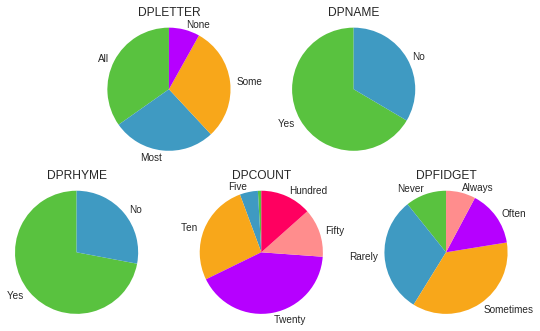

In [27]:
reload(pp)

# Plot distribution of samples for each label
pp.label_pies(nursery_labels)

### Label Choice
For the sake of simplicity and clarity moving forward, I will use just one label, DPNAME.  This label represents whether or not a child can write their own name.

In [28]:
# Assign one label to track through notebook
nursery_label = nursery_labels['DPNAME']

## Preprocessing
### Missing Values
The first necessary preprocessing step is to deal with missing values.  My strategy is to fill in missing information for a data point based on those values that occur most frequently in other similar data points.  

To achieve this I will find the 50 nearest neighbors of every point using a K Nearest Neighbors algorithm.  For a point in a dataset, KNN finds the K points that are nearest to it using a distance metric.  I will run KNN using Euclidean distance as my metric so I will need to scale the data.  To get an accurate result I will also need to impute missing values.  This seems counterintuitive because I am using KNN in order to find good values to impute.  To work around this issue I will replace all the missing values with the median value of each feature to bootstrap KNN.  This will allow me to gather the information that I need for an imputation strategy that matches the data more closely.

In [29]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import robust_scale

# Impute median
imp = Imputer(missing_values=-1, strategy='median')
knn_data = pd.DataFrame(imp.fit_transform(nursery_data))
knn_data.columns = nursery_data.columns
knn_data.index = nursery_data.index

# Standardize data for KNN
scaled_knn_data = pd.DataFrame(robust_scale(knn_data))
scaled_knn_data.columns = knn_data.columns
scaled_knn_data.index = knn_data.index

In [30]:
from sklearn.neighbors import NearestNeighbors

# Perform KNN-50 on scaled data
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(scaled_knn_data)
dist, knn_index = neigh.kneighbors(scaled_knn_data)
imp = Imputer(missing_values=-1, strategy='mean')
knn_data_dicts = []
rows_missing_values = []

# Impute nursery_data based on most frequent values of nearest neighbors
for i, row in nursery_data.iterrows():
    # Get 100 nearest neighbors of the ith row using knn_index
    nn = nursery_data.iloc[knn_index[i]]
    
    # Impute most frequent values in place of missing values
    imputed_row = np.round(imp.fit_transform(nn)[0])
    knn_data_dicts.append(dict(zip(nursery_data.columns, imputed_row)))
    
    # Catch the rows that end up with missing values
    if len(imputed_row) < 125:
        rows_missing_values.append(i)

imputed_nursery_data = pd.DataFrame(knn_data_dicts)

# Remove the rows that are missing values after KNN-Imputer
imputed_nursery_data = imputed_nursery_data.drop(rows_missing_values, axis=0)
nursery_label = nursery_label.drop(rows_missing_values, axis=0)

### Outlier Detection
The information in this dataset was taken from survey data so there is a high chance of inaccuracy in the dataset.  There are some values that seem out of realistic bounds.  I will use an Isolation Forest to remove some of the worst outliers in the dataset before trying to use it with any other machine learning algorithms.

Isolation Forest is a type of Random Decision Tree Forest that is used to detect anomalies in data.  Each tree in an Isolation Forest splits a randomly selected feature at random thresholds.  Anomalies tend to have shorter paths from root to leaf than inliers.  With a forest of trees produced this way, the samples that on average have the shortest paths are likely to be outliers. 

In [31]:
# Scale dataset that now contains no missing values
scaled_imputed_data = pd.DataFrame(robust_scale(imputed_nursery_data))
scaled_imputed_data.columns = imputed_nursery_data.columns
scaled_imputed_data.index = imputed_nursery_data.index

In [32]:
from sklearn.ensemble import IsolationForest

# Find outliers in each dataset with Isolation Forest and remove outliers from dataset
if_clf = IsolationForest(n_estimators=1000, contamination=0.03, random_state=42)
if_clf.fit(scaled_imputed_data)
pred = if_clf.predict(scaled_imputed_data)
u, u_counts = np.unique(pred, return_counts=True)

# Remove outliers
pred = pred.astype(bool)
imputed_nursery_data = imputed_nursery_data.loc[pred]
scaled_imputed_data = scaled_imputed_data.loc[pred]
nursery_label = nursery_label.loc[pred]
print "Removed {} outliers from the nursery school dataset leaving {} datapoints remaining.".format(*u_counts)

Removed 71 outliers from the nursery school dataset leaving 2290 datapoints remaining.


## Feature Selection
Now that the missing values have been taken care of, I will try to find the most important features in the data.  These features represent the influences on a young child that have the most impact on their ability to learn.  I will use a Random Forest Classifier to find a near optimal tree for the large set of input features.  Then, by examining the features that have the most influence on the tree, I will be able to find the most important features.

A Random Forest classifier is another type of Decision Tree ensemble.  The scikit-learn documentation has a good high level description of the algorithm.  Basically, Random Forest creates many decision trees using different sub-samples of data. By averaging the results from the trees it finds more accurate predictions and reduces overfitting. 

In [33]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_imputed_data, nursery_label, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def find_important_features(X_tr, X_te, y_tr, y_te):
    ''' Trains a RandomForestClassifier on the given label.
    Reports training and testing scores
    Returns list of tuples containing most important features and their importance scores
    '''
    # Get the estimator for DPNAME
    clf = RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=10, oob_score=False, 
                                 bootstrap=False, class_weight='balanced', random_state=42)
    clf.fit(X_tr, y_tr)

    # Report the F1 score for training and testing after parameter tuning
    train_pred = clf.predict(X_tr)
    print "Training F1 score of {}.".format(f1_score(y_tr, train_pred, average=None))
    test_pred = clf.predict(X_te)
    print "Testing F1 score of {}.\n".format(f1_score(y_test, test_pred, average=None))

    # Retrieve feature importances and store in list of tuples (feature, importance)
    importances = clf.feature_importances_
    indices = importances.argsort()[::-1]

    important_features = []
    for i in range(0,15):
        important_features.append((X_tr.axes[1][indices[i]], clf.feature_importances_[indices[i]]))
        
    return important_features

In [35]:
# Find important features for each label (this will take a few minutes)
dpname_feature_tuples = find_important_features(X_train, X_test, y_train, y_test)

# Print 15 most important features from DPNAME
print "Top 15 Feature Importances DPNAME:"
for i in range(0, 15):
    print "{}. {} {}".format(i+1, dpname_feature_tuples[i][0], dpname_feature_tuples[i][1])

Training F1 score of [ 0.97297297  0.94603175].
Testing F1 score of [ 0.8365243   0.58426966].

Top 15 Feature Importances DPNAME:
1. ENROLL 0.0768501532035
2. CPNNOW 0.0659431574738
3. CPVISIT 0.0496104135232
4. CPHRS 0.0349363058369
5. FOCHREAD 0.0339035032159
6. SEDOWELL 0.0260120694442
7. MOMNEW1 0.0252258148988
8. HINCOME 0.0241772995785
9. TVHOURS 0.0229839074739
10. FOLETTR 0.0219722264726
11. HABOOKS 0.02021511522
12. DADGRADE1 0.0175661658284
13. MOMGRADE1 0.0173278271916
14. FORDDAY 0.0171693309811
15. ZIPLOCL 0.0161429015767


### Preliminary Analysis
Each of these features can be compared to their definitions in the codebook.  It seems that some of the factors that are important for a child's ability to count are enrollment in school, the number of books they own, what age his/her mother first became mom, the amount of tv they watch, parent education, etc.  According to these results the first 5 features make up more than 20% of the predictive power of the 125 features, and the first 10 make up more than 30%.

## Values Sanity Check
Even after eliminating outliers with an Isolation Forest, it is possible that some values for continuous variables are still unrealistic.  All continuous variables in this dataset are integers with a small enough range that they can be visually inspected.  I will look at the unique values of the continuous variables that are considered important features.

In [36]:
# Put all important features in a list for indexing with dataframe
dpname_important_features = []
for tup in dpname_feature_tuples:
    dpname_important_features.append(tup[0])

# Use only important features from here forward
imputed_nursery_data = imputed_nursery_data[dpname_important_features]

# Print unique values of continuous variables for sanity check
print "Unique values for number of books child owns:\n{}".format(
    np.unique(imputed_nursery_data['HABOOKS']))
print "Unique values for hours a week spent at a daycare center:\n{}".format(
    np.unique(imputed_nursery_data['CPHRS']))
print "Unique values for number of visits to daycare center:\n{}".format(
    np.unique(imputed_nursery_data['CPVISIT']))
print "Unique values for hours a week child spends watching TV:\n{}".format(
    np.unique(imputed_nursery_data['TVHOURS']))
print "Unique values for age when child's mother first had a child:\n{}".format(
    np.unique(imputed_nursery_data['MOMNEW1']))
print "Unique values for number of times child's school contacted to see if they were doing well:\n{}".format(
    np.unique(imputed_nursery_data['SEDOWELL']))
print "Unique values for minutes a child is read to in a day:\n{}".format(
    np.unique(imputed_nursery_data['FORDDAY']))

Unique values for number of books child owns:
[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   15.   20.   21.   22.   24.   25.   30.   34.   35.   36.
   40.   42.   45.   48.   50.   55.   60.   65.   70.   75.   80.   85.
   90.   99.  100.  101.  110.  120.  125.  130.  150.  175.  190.  199.
  200.]
Unique values for hours a week spent at a daycare center:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  35.  36.  37.  38.  39.  40.  42.  43.  44.  45.  46.  48.
  50.  52.  55.]
Unique values for number of visits to daycare center:
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  24.  25.  26.  28.  30.  32.  35.  36.
  40.  50.  56.  60.  70.  72.  75.  84.  99.]
Unique values for hours a week child spends watching TV:
[   0.    2.    4.    5.    6.    7.    8

### Remove Outliers
There are several values here that seem unreasonable.  It does not seem possible to me that a child would spend more than 80 hours a week watching TV or that a child's school would contact his/her parents more than 100 times.  I will remove the rows containing out of bounds values.

In [37]:
# Remove outliers
print "Before removing outliers nursery dataset contains {} samples.".format(imputed_nursery_data.shape[0])

nursery_label = nursery_label[imputed_nursery_data['TVHOURS'] <= 35]
imputed_nursery_data = imputed_nursery_data[imputed_nursery_data['TVHOURS'] <= 35]
print "After removing TVHOURS outliers nursery dataset contains {} samples.".format(imputed_nursery_data.shape[0])

nursery_label = nursery_label[imputed_nursery_data['SEDOWELL'] <= 50]
imputed_nursery_data = imputed_nursery_data[imputed_nursery_data['SEDOWELL'] <= 50]
print "After removing SEDOWELL outliers nursery dataset contains {} samples.".format(imputed_nursery_data.shape[0])

nursery_label = nursery_label[imputed_nursery_data['FORDDAY'] <= 45]
imputed_nursery_data = imputed_nursery_data[imputed_nursery_data['FORDDAY'] <= 45]
print "After removing FORDDAY outliers nursery dataset contains {} samples.".format(imputed_nursery_data.shape[0])

Before removing outliers nursery dataset contains 2361 samples.
After removing TVHOURS outliers nursery dataset contains 2251 samples.
After removing SEDOWELL outliers nursery dataset contains 2236 samples.
After removing FORDDAY outliers nursery dataset contains 2141 samples.


## Visual Inspection
### Categorical Variables
There are four variables with 3 or less categories.  These can be plotted side by side in a bar chart.  The following visual shows the total amount of children in each category, and the percentage of those children that are able to write their own names.

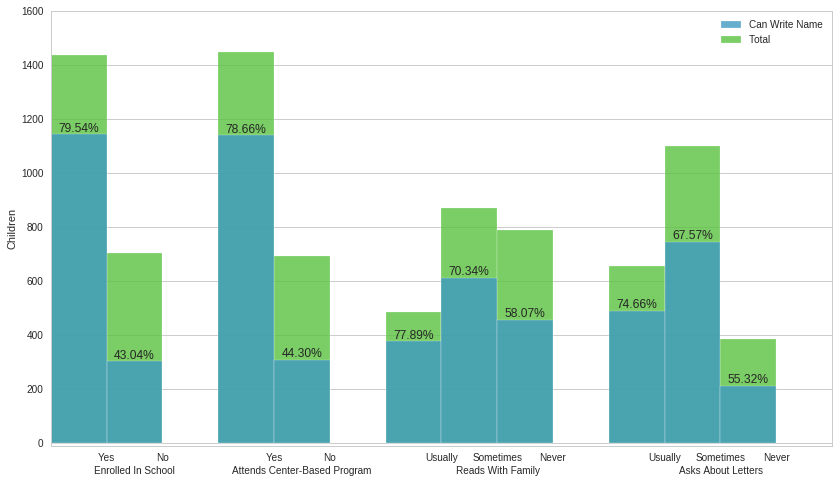

In [38]:
reload(pp)

pp.plot_categorical_features(imputed_nursery_data, nursery_label)

### Categorical Variables (Parental Education)
There are two important features that represent a parent's level of education.  They are very similar so it is only necessary to plot one.  I will create another bar chart similar to the previous one with MOMGRADE1.  I chose MOMGRADE1 over DADGRADE1 because it had a slightly higher imortance score.

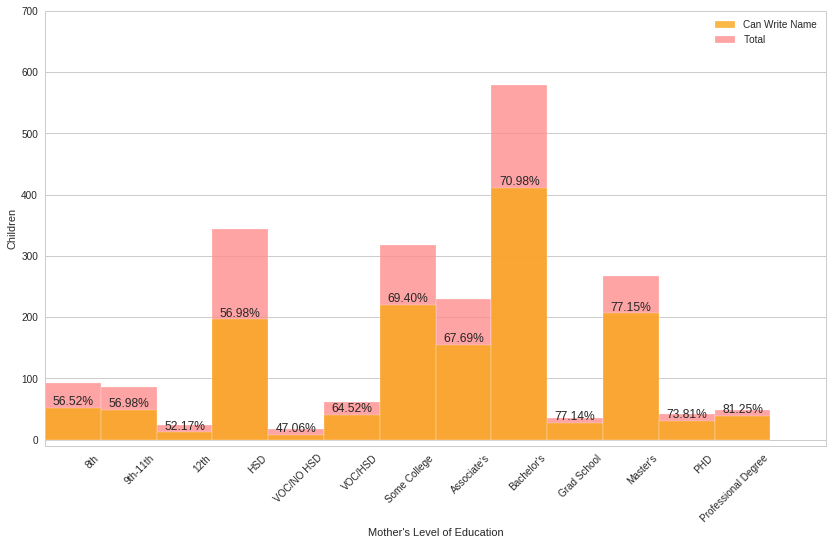

In [39]:
reload(pp)

pp.plot_parent_education(imputed_nursery_data, nursery_label)

### Heat Maps
Each of the two following cells are heatmaps that show the relationship between one continuous variable, and the label.  The first examines the amount of TV a child watches, and the second looks at the age when a mother had her first child.  To prepare these visuals, I created bins that represent a range of values and act as categories.  Similar to the bar charts above these visuals represent the percentage of children in each category that can or cannot write their own name.

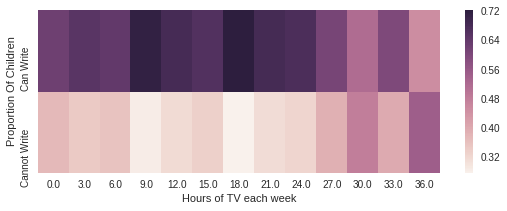

In [40]:
reload(pp)

pp.tv_heatmap(imputed_nursery_data, nursery_label)

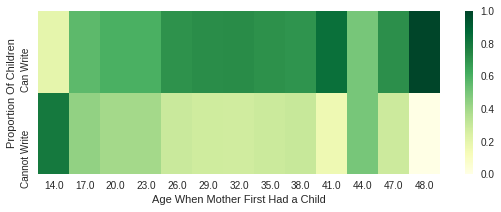

In [41]:
reload(pp)

pp.momnew_heatmap(imputed_nursery_data, nursery_label)

## Supervised Learning Model
Now that the most influential features are known it will be interesting to see just how well they predict a child's learning.  I will scale the data, and try several supervised learning algorithms to find the one that performs best as a predictor for this problem.  I will then perform a Grid Search for parameter optimization.

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data for supervised learning
nml= MinMaxScaler()
normalized_data = pd.DataFrame(nml.fit_transform(imputed_nursery_data))
normalized_data.columns = imputed_nursery_data.columns
normalized_data.index = imputed_nursery_data.index

X_train, X_test, y_train, y_test = train_test_split(normalized_data, nursery_label, test_size=0.2, random_state=42)

In [43]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Tests several supervised learners, prints training and testing scores
# Returns learner with best testing score.
def find_best_learner(X_tr, X_te, y_tr, y_te):
    '''Tests several supervised learning algorithms 
    and displays training and testing scores.  
    '''
    # Naive Bayes
    nb_clf = GaussianNB()
    nb_clf.fit(X_tr, y_tr)
    print "Gaussian Naive Bayes Classifier has training F1 score of {}".format(
        f1_score(y_tr, nb_clf.predict(X_tr), average=None))
    print "Gaussian Naive Bayes Classifier has testing F1 score of {}".format(
        f1_score(y_te, nb_clf.predict(X_te), average=None))
    
    # SVC
    sv_clf = SVC()
    sv_clf.fit(X_tr, y_tr)
    print "Support Vector Classifier has training F1 score of {}".format(
        f1_score(y_tr, sv_clf.predict(X_tr), average=None))
    print "Support Vector Classifier has testing F1 score of {}".format(
        f1_score(y_te, sv_clf.predict(X_te), average=None))
    
    # Logistic
    log_clf = LogisticRegression()
    log_clf.fit(X_tr, y_tr)
    print "Logistic Regression Classifier has training F1 score of {}".format(
        f1_score(y_tr, log_clf.predict(X_tr), average=None))
    print "Logistic Regression Classifier has testing F1 score of {}".format(
        f1_score(y_te, log_clf.predict(X_te), average=None))
    
    # Bagging
    bag_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=100)
    bag_clf.fit(X_tr, y_tr)
    print "Bagging Classifier has training F1 score of {}".format(
        f1_score(y_tr, bag_clf.predict(X_tr), average=None))
    print "Bagging Classifier has testing F1 score of {}".format(
        f1_score(y_te, bag_clf.predict(X_te), average=None))
    

In [44]:
find_best_learner(X_train, X_test, y_train, y_test)

Gaussian Naive Bayes Classifier has training F1 score of [ 0.78643769  0.5793582 ]
Gaussian Naive Bayes Classifier has testing F1 score of [ 0.82119205  0.57480315]
Support Vector Classifier has training F1 score of [ 0.79493892  0.58480565]
Support Vector Classifier has testing F1 score of [ 0.81383855  0.5498008 ]
Logistic Regression Classifier has training F1 score of [ 0.81136738  0.54016064]
Logistic Regression Classifier has testing F1 score of [ 0.84375    0.5412844]
Bagging Classifier has training F1 score of [ 0.85186739  0.66090298]
Bagging Classifier has testing F1 score of [ 0.815625   0.4587156]


### Choosing a Model
Gaussian Naive Bayes had the highest overall testing score.  However, the scikit-Learn implementation of Naive Bayes does not have many parameters to tune, so this score cannot be improved on.  The Support Vector Machine performed nearly as well, and has many tunable parameters.  I will use the SVC going forward and try to improve on the initial testing score.

Support Vector Machines are one method to find separating lines in a dataset and thus split the points into classes.  It works with a small subset of the data and maximizes the distance between the dividing line and the points closest to it.

Grid Search Cross Validation takes in a machine learning algorithm, a set of parameters, and a scorer.  It exhaustively tests the list of parameter tunings to find the optimal setup for the model.  The next cell will take a few minutes to run.

In [45]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

# Create a classifier for tuning
clf = SVC()

# Create cross-validation sets from the training data
cv = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 42)
cv_sets = cv.split(X_train)

# Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {'C':[1,10,100,1000], 
          'kernel':['rbf','sigmoid'], 
          'gamma':['auto', .01, .001], 
          'shrinking':[True,False]}

# Transform 'performance_metric' into a scoring function using 'make_scorer' 
scoring_fnc = make_scorer(f1_score)

# Create the grid search object
grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(X_train, y_train)

# Print optimal paramter set
print "Best parameters: {}".format(grid.best_params_)

# Train model with the optimal set up
clf = grid.best_estimator_
clf.fit(X_train, y_train)
print "Training F1 score: {}".format(f1_score(y_train, clf.predict(X_train)))
print "Testing F1 score: {}".format(f1_score(y_test, clf.predict(X_test)))

Best parameters: {'kernel': 'rbf', 'C': 100, 'shrinking': True, 'gamma': 'auto'}
Training F1 score: 0.822453222453
Testing F1 score: 0.844236760125


### Benchmark Test
In order to check that the testing scores are not a random fluke, I will choose labels randomly and test performance.

In [46]:
benchmark_train = np.random.choice(range(1, 3), size=y_train.shape[0], replace=True)
benchmark_test = np.random.choice(range(1, 3), size=y_test.shape[0], replace=True)

print "Benchmark training F1 score: {}".format(f1_score(y_train, benchmark_train))
print "Benchmark testing F1 score: {}".format(f1_score(y_test, benchmark_test))

Benchmark training F1 score: 0.587775061125
Benchmark testing F1 score: 0.582230623819


### Optimal Parameters
C is the penalty parameter related to the idea of a "soft-margin".  Oftentimes an SVM that has a simple boundary, but misclassifies a few points in training will do better than one that misclassifies fewer, but has a more complex boundary.  Essentially C tells the SVM how to balance misclassification in the training set and simplicity in its boundary.  A high value for C means that your model will avoid misclassifying points in training.  The tuned model has C set to 100.  This means that in training, the SVM will avoid misclassifying points with some stringency.

This Support Vector Classifier uses an Radial Basis Function kernel (the default for scikit-learn).  Gamma is a parameter of the rbf.  As gamma increases,  bias increases and variance decreases.  The Grid Search found that the optimal tuning used 'auto' for gamma, which is 1/(training set size).  So in this instance, gamma is less than 0.01.

## Testing Impact of Adjusted Values
We have found features in this dataset that are most influential on whether or not a child can write his/her own name.  We also have a predictor now of whether or not a child can write his/her name based on these features.  We can make an estimate of how much impact a change in one of these features would have.  For example, if a parent spends more time reading with their child, how much will that affect a child's ability to read, write, count, etc.  This does make the assumption that this data would generalize to other real world situations which may or may not be the case.

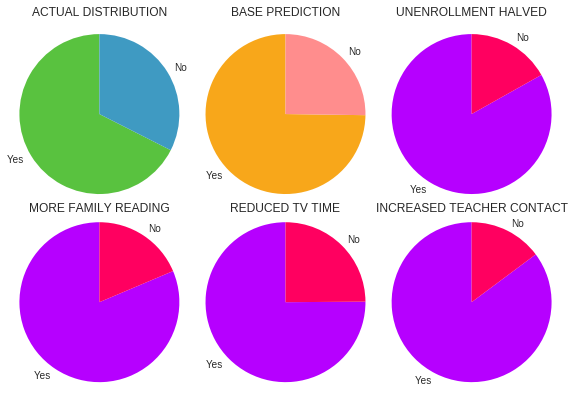

In [47]:
reload(pp)

pp.compare_pies(clf, normalized_data, nursery_label)

### Analysis
According to the predictive model developed in this project, adjusting even one of the features in this dataset would have a significant impact on a child's ability to write.  When the number of children not in a nursery school program is halved, the number of children who cannot write their name is nearly halved as well.  Parents reading with their children and increased contact between teachers and parents also seem to have a significant impact.  I was surprised to see that reducing the amount of time spent watching TV did not increase ability to write by itself.  Again, it is important to acknowledge that this may not be representative of all real world situations.  To verify results or understand the issue more deeply it might be necessary to collect more data and perform more formal studies.

## Conclusions
In this project I was able to find some features that are significant in a child's cognitive development.  I was satisfied to see that the Random Forest turned up some answers that coincided well with conventional wisdom (e.g. children that are enrolled in school will be better at writing).  It was an encouraging sign that the algorithm was doing its job.  It was also interesting to see some less obvious results, like the indication that children whose mothers wait until later in life to have children tend to be more able to learn.  This information could help parents to be more aware of how to help their children to thrive.

One of the most difficult parts of this project was cleaning and preparing the data.  Beyond the poring over the descriptions of features, it was important to recognize where there were flaws and limitations.  Survey data is nearly guaranteed to be inaccurate and biased.  In many cases it was hard to be sure if respondents were being overly generous with praise of their children, or if the information was accurate (e.g. a vast majority of parents reporting that their children loved school, or a parent reporting that their child watched over 100 hours of television a week).  Despite these limitations I feel that there was some interesting information gained through this project.

This project could possibly be made more convincing by having a second round of feature selection done on a separate, but similar set of data.  If the results were similar in a second round of testing, the findings of this project would be more substantiated.  It would help those who were interested in applying this information in some way to act with more confidence.